# Individual Planning Report

## Individual Planning Report  

The dataset contains 196 observations, representing individual players and their associated characteristics. It includes both numerical variables such as hours played and age, as well as categorical variables like experience level, subscription status, and gender. 

There are **five variables** in the dataset, which are described below:  
- **`age` (Integer)** – Age of the player.  
- **`experience` (Categorical: Beginner, Amateur, Pro, Regular, Veteran)** – Player's experience level in the game.  
- **`played_hours` (Numeric)** – Total hours played by the player.  
- **`subscribe` (Boolean: TRUE or FALSE)** – Indicates whether the player has subscribed to the game’s newsletter.  
- **`gender` (Categorical)** – Player's identified gender.  

While the dataset offers valuable insights, some issues need to be considered. Data imbalance may be present, as the majority of players could fall into specific age groups or experience levels, potentially skewing results. 

## Questions

- **Broad Question:** What player characteristics and behaviors are most predictive of subscribing to a game-related newsletter? How do these features differ between various player types?  
- **Specific Question:** "How well do experience level and hours played predict whether a player subscribes, and which variable is the stronger predictor?"
- The dataset provides key variables such as hours played, experience level, and subscription status, allowing for a direct analysis of how these factors relate.  
- Since all relevant attributes are included in a single row for each player, it simplifies data exploration and modeling.  

## Analysis Plan
1. Visualizing Player Experience and Subscription Status  
- I will analyze Figure 1: Distribution of Players' Experience by coloring the bar plot based on whether players subscribed or not.  
- This will help identify patterns in experience level and subscription behavior.  

2. Examining Hours Played vs. Subscription Status  
- I will compare average hours played between subscribed and unsubscribed players using a summary table.  
- To achieve this, I will use the `select()` function to extract relevant columns and analyze their relationship to subscription status.  

By implementing these approaches, I aim to determine whether player experience and hours played are strong predictors of subscribing to the newsletter. 

## Exploratory Data Analysis and Visualization

In [1]:
library(tidyverse)
library(repr)
options(repr.matrix.max.rows = 6)
library(ggplot2)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [2]:
players_file <- read_csv("data/players.csv")
players_file
player_file1 <- players_file |>
                    select (-hashedEmail, -name)
player_file1

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
⋮,⋮,⋮,⋮,⋮,⋮,⋮
Amateur,FALSE,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Dylan,Prefer not to say,17
Amateur,FALSE,f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,2.3,Harlow,Male,17
Pro,TRUE,d9473710057f7d42f36570f0be83817a4eea614029ff90cf50d8889cdd729d11,0.2,Ahmed,Other,NA


experience,subscribe,played_hours,gender,Age
<chr>,<lgl>,<dbl>,<chr>,<dbl>
Pro,TRUE,30.3,Male,9
Veteran,TRUE,3.8,Male,17
Veteran,FALSE,0.0,Male,17
⋮,⋮,⋮,⋮,⋮
Amateur,FALSE,0.0,Prefer not to say,17
Amateur,FALSE,2.3,Male,17
Pro,TRUE,0.2,Other,NA


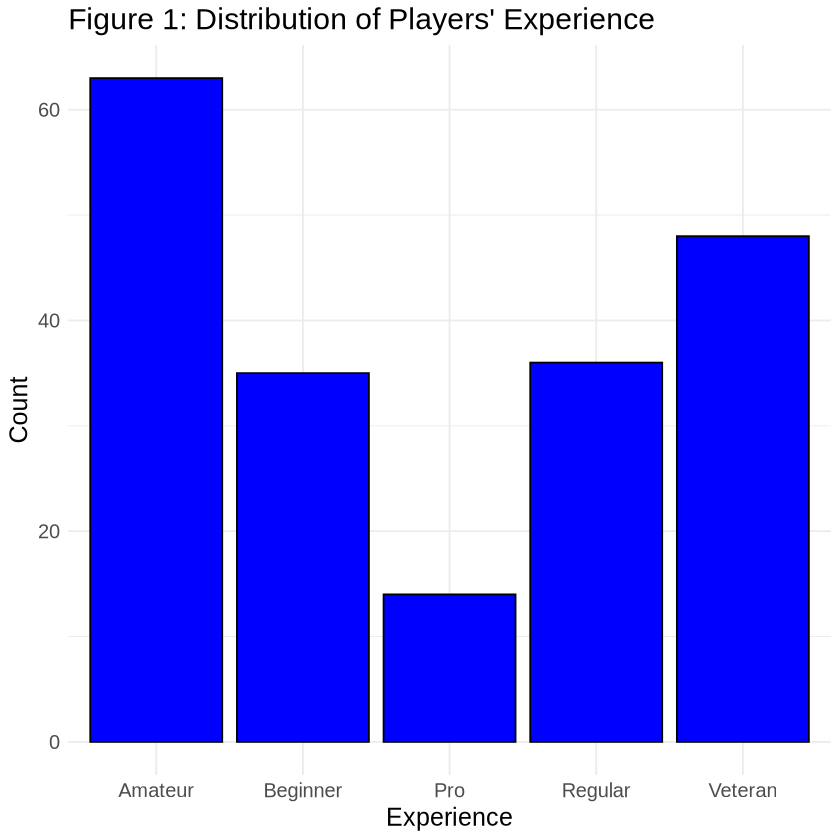

In [3]:
player_exp <- players_file |> 
                group_by (experience) |>
                summarize(count = n()) |>
                select(experience, count)
#player_exp

bar_player_exp <- ggplot(players_file, aes(x = experience)) +
  geom_bar(fill = "blue", color = "black") +  
  labs(title = "Figure 1: Distribution of Players' Experience", x = "Experience", y = "Count") +
  theme_minimal() +
  theme (text = element_text(size = 15))

bar_player_exp

In [4]:
subscribe_vs_hours_played <- players_file |>
            select(subscribe, played_hours) |>
            group_by(subscribe) |>
            summarize (mean_hours_played = mean(played_hours))
subscribe_vs_hours_played

subscribe,mean_hours_played
<lgl>,<dbl>
FALSE,0.5019231
TRUE,7.7756944


#### Compute the mean value for each quantitative variable in the players.csv data set. Report the mean values in a table format

In [5]:
mean <- players_file |>
            select(played_hours, Age) |>
            summarize (mean_played_hours = mean(played_hours),
                       mean_age = mean(Age, na.rm = TRUE))

mean

mean_played_hours,mean_age
<dbl>,<dbl>
5.845918,20.52062


### Exploratory Analysis/ observation
- Figure 1: 63 out of 196 players are amateur players, making them a significant portion of the group. The pro players have the smallest representation, with only 14 out of 196.
- Subscription vs. Hours Played: The data shows that subscribed players tend to play significantly more hours on average compared to unsubscribed players. The subscribed group has an average of 7.78 hours, whereas the unsubscribed group has only 0.50 hours on average.

## Methods and Plan
<br>The K-Nearest Neighbors (KNN) classification method is appropriate because it allows for classification based on two key variables—experience and hours played—without requiring prior knowledge of the structure or relationships within the dataset. This makes it particularly useful in this case, as we can assess how well each variable predicts subscription status without needing a model of the dataset.
<br>Each variable will first be compute separately to evaluate its predictive effectiveness, by the calculated precision. The final comparison will help determine which variable is the stronger predictor.
<br>KNN assumes that similar players exhibit similar subscription behaviors and requiring scaling and centering played_hours to prevent it from dominating. 
<br> One limitation I foresee is a slight data imbalance in the experience vs. subscription status relationship, as the distribution across the five experience categories is not entirely equal. This imbalance could impact the model’s ability to generalize across all groups.
<br>To optimize KNN, I will test different k-values (k = 2,3,4,5,6). The dataset will be split 30% for training and 70% for testing, and 5-fold cross-validation will be applied to improve reliability and prevent overfitting.
<br>By following this approach, I aim to build an accurate and well-validated KNN model that determines whether experience or hours played is the stronger predictor of subscription status for players.

In [6]:
print("all done")

[1] "all done"
